# The Spark Foundation
## Name : Kalyani Gupta

# GRIP TASK 2 : Prediction using Decision Tree Algorithm

## Task : Create the Decision Tree classifier and visualize it graphically.

In [57]:
#importing libraries

import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns

### Exploring Data

In [58]:
data = pd.read_csv('iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [59]:
data.shape

(150, 6)

In [60]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [61]:
#Count of Species

data['Species'].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

In [62]:
#Check for Missing values

data.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### Data Preprocessing

In [63]:
#Converting Categorical data to Continuous data

le = LabelEncoder()
data['Species'] = le.fit_transform(data['Species'])

Data Preparation for Model Fitting

In [64]:
X = data.iloc[:,1:-1]
Y = data.iloc[:,-1:]
Y.head()

,Species
0,0
1,0
2,0
3,0
4,0


In [65]:
#Splitting data to train and test set

X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 20)
X_test.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
47,4.6,3.2,1.4,0.2
73,6.1,2.8,4.7,1.2
74,6.4,2.9,4.3,1.3
129,7.2,3.0,5.8,1.6
67,5.8,2.7,4.1,1.0


In [66]:
#train and test set distribution

X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((120, 4), (30, 4), (120, 1), (30, 1))

### Training the Model

In [67]:
model = DecisionTreeClassifier(criterion='gini')
model.fit(X_train,Y_train)

DecisionTreeClassifier()

### Testing the Model

In [68]:
pred = model.predict(X_test)
pred

array([0, 1, 1, 2, 1, 1, 2, 0, 2, 0, 2, 1, 1, 0, 0, 2, 0, 1, 2, 1, 1, 2,
       2, 0, 1, 1, 1, 0, 2, 1])

### Evaluating the model 

In [69]:
test_accuracy = accuracy_score(Y_test,pred)
print("Test Accuracy: ", round((test_accuracy)*100,2))

Test Accuracy:  93.33


Model Accuracy is 93.3%.This shows model performed quite well on the given dataset

In [70]:
#Creating Confusion matrix

cm = confusion_matrix(Y_test, pred)
cm

array([[ 8,  0,  0],
       [ 0, 11,  0],
       [ 0,  2,  9]])

In [71]:
cm_df = pd.DataFrame(cm,
                     index = ['Iris-virginica', 'Iris-setosa', 'Iris-versicolor'], 
                     columns = ['Iris-virginica', 'Iris-setosa', 'Iris-versicolor'])

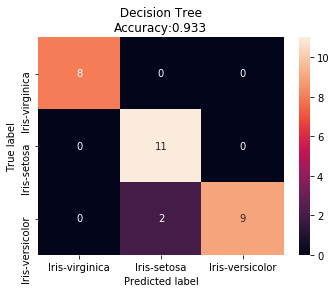

In [72]:
#Plotting confusion matrix using heatmap

plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df, annot=True)
plt.title(' Decision Tree \nAccuracy:{0:.3f}'.format(test_accuracy))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## Comparing Actual and Predicted Values

In [73]:
actual_species = Y_test['Species']

In [74]:
comp_data = pd.DataFrame({'Actual' : actual_species, 'Predicted':pred})
comp_data

,Actual,Predicted
47,0,0
73,1,1
74,1,1
129,2,2
67,1,1
89,1,1
143,2,2
21,0,0
108,2,2
12,0,0


## Visualising the Decision tree graph

In [75]:
data_feature_names = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
data_class_names = ['Iris-virginica', 'Iris-setosa', 'Iris-versicolor']

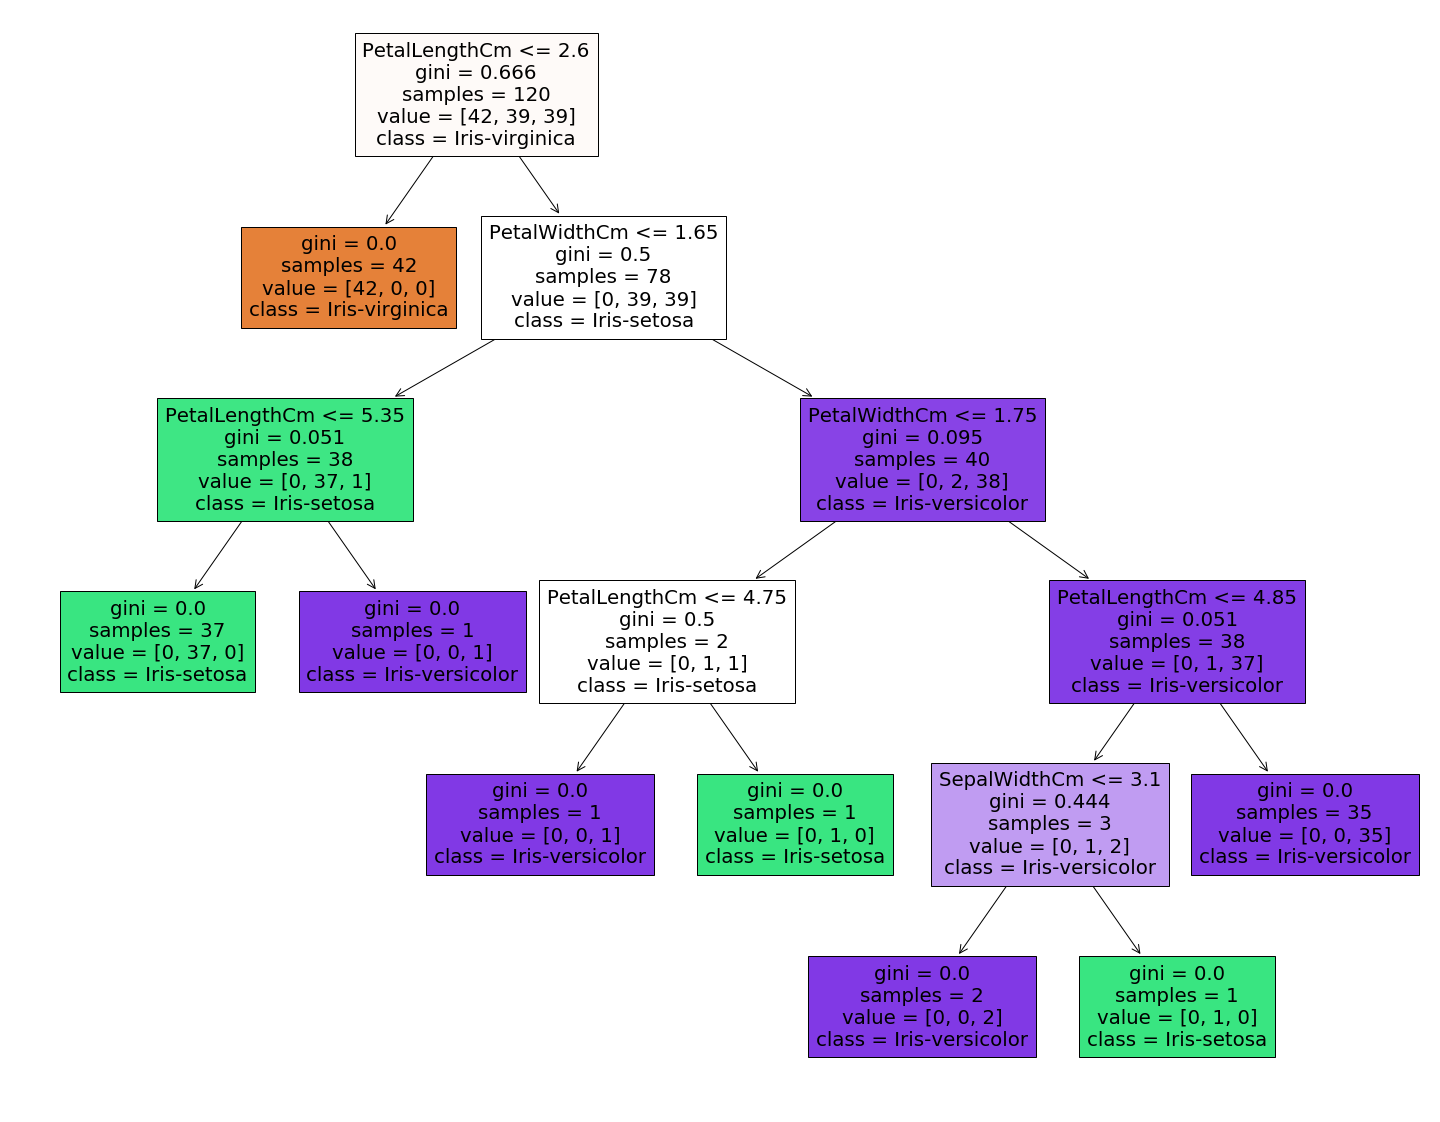

In [76]:
fig = plt.figure(figsize=(25,20))
_=tree.plot_tree(model,feature_names =data_feature_names,class_names = data_class_names, filled=True)
fig.savefig("decision_tree.png")